 # Project - Python and high performance computing 
---

## Unedited script

In [2]:
# from os.path import join
# import numpy as np


# def load_data(load_dir, bid):
#     SIZE = 512
#     u = np.zeros((SIZE+2, SIZE+2))
#     u[1:-1, 1:-1] = np.load(join(load_dir, f"{bid}_domain.npy"))
#     interior_mask = np.load(join(load_dir, f"{bid}_interior.npy"))
#     return u, interior_mask


# def jacobi(u, interior_mask, max_iter, atol=1e-6):
#     u = np.copy(u)
#     for _ in range(max_iter):
#         u_new = (u[:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, :-1] + u[1:-1, 1:]) / 4
#         u_new_interior = u_new[interior_mask]
#         delta = np.abs(u[1:-1, 1:-1][interior_mask] - u_new_interior).max()
#         u[1:-1, 1:-1][interior_mask] = u_new_interior
#         if delta < atol:
#             break
#     return u


# def summary_stats(u, interior_mask):
#     u_interior = u[1:-1, 1:-1][interior_mask]
#     mean_temp = u_interior.mean()
#     std_temp = u_interior.std()
#     pct_above_18 = np.sum(u_interior > 18) / u_interior.size * 100
#     pct_below_15 = np.sum(u_interior < 15) / u_interior.size * 100
#     return {
#         "mean_temp": mean_temp,
#         "std_temp": std_temp,
#         "pct_above_18": pct_above_18,
#         "pct_below_15": pct_below_15,
#     }


# if __name__ == '__main__':
#     import numpy as np
#     from os.path import join

#     LOAD_DIR = '/dtu/projects/02613_2025/data/modified_swiss_dwellings/'

#     with open(join(LOAD_DIR, 'building_ids.txt'), 'r') as f:
#         building_ids = f.read().splitlines()

#     N = 1  # Default number of buildings

#     all_u0 = np.empty((N, 514, 514))
#     all_interior_mask = np.empty((N, 512, 512), dtype='bool')

#     for i, bid in enumerate(building_ids[:N]):
#         u0, interior_mask = load_data(LOAD_DIR, bid)
#         all_u0[i] = u0
#         all_interior_mask[i] = interior_mask

#     MAX_ITER = 20000
#     ABS_TOL = 1e-4

#     all_u = np.empty_like(all_u0)

#     for i, (u0, interior_mask) in enumerate(zip(all_u0, all_interior_mask)):
#         u = jacobi(u0, interior_mask, MAX_ITER, ABS_TOL)
#         all_u[i] = u

#     stat_keys = ['mean_temp', 'std_temp', 'pct_above_18', 'pct_below_15']
#     print('building_id, ' + ', '.join(stat_keys))

#     for bid, u, interior_mask in zip(building_ids, all_u, all_interior_mask):
#         stats = summary_stats(u, interior_mask)
#         print(f"{bid},", ", ".join(str(stats[k]) for k in stat_keys))


## Local run
---

### Functions 

In [3]:
from os.path import join
import numpy as np


def load_data(domain_path, interior_path):
    SIZE = 512
    u = np.zeros((SIZE+2, SIZE+2))
    u[1:-1, 1:-1] = np.load(domain_path)
    interior_mask = np.load(interior_path)
    return u, interior_mask

def jacobi(u, interior_mask, max_iter, atol=1e-6):
    u = np.copy(u)
    for _ in range(max_iter):
        u_new = 0.25 * (u[:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:])
        u_new_interior = u_new[interior_mask]
        delta = np.abs(u[1:-1, 1:-1][interior_mask] - u_new_interior).max()
        u[1:-1, 1:-1][interior_mask] = u_new_interior
        if delta < atol:
            break
    return u


def summary_stats(u, interior_mask):
    u_interior = u[1:-1, 1:-1][interior_mask]
    mean_temp = u_interior.mean()
    std_temp = u_interior.std()
    pct_above_18 = np.sum(u_interior > 18) / u_interior.size * 100
    pct_below_15 = np.sum(u_interior < 15) / u_interior.size * 100
    return {
        "mean_temp": mean_temp,
        "std_temp": std_temp,
        "pct_above_18": pct_above_18,
        "pct_below_15": pct_below_15,
    }

import matplotlib.pyplot as plt

# Visualization function for the heatmap
def visualize_temperature(u, title="Temperature Distribution"):
    plt.figure(figsize=(8, 6))
    plt.imshow(u, cmap='hot', origin='lower')
    plt.colorbar(label='Temperature (°C)')
    plt.title(title)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()


### Visualization functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import argparse
from pathlib import Path
import glob

def visualize_domain(file_path, save_path=None, show=True):
    """
    Visualize a domain file containing initial conditions with appropriate colormap.

    Args:
        file_path: Path to the domain.npy file
        save_path: Optional path to save the visualization
        show: Whether to display the plot
    """
    # Load the numpy array
    data = np.load(file_path)
    building_id = os.path.basename(file_path).split('_')[0]

    # Create figure
    plt.figure(figsize=(10, 8))

    # Plot the data with a colormap suitable for temperature
    im = plt.imshow(data, cmap='hot', interpolation='nearest')

    # Add a colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Temperature Value')

    # Add title and labels
    plt.title(f'Building {building_id}: Initial Temperature Conditions')
    plt.xlabel('X Grid Position')
    plt.ylabel('Y Grid Position')

    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show if requested
    if show:
        plt.show()
    else:
        plt.close()

def visualize_interior(file_path, save_path=None, show=True):
    """
    Visualize an interior mask file with binary colormap.

    Args:
        file_path: Path to the interior.npy file
        save_path: Optional path to save the visualization
        show: Whether to display the plot
    """
    # Load the numpy array
    data = np.load(file_path)
    building_id = os.path.basename(file_path).split('_')[0]

    # Create figure
    plt.figure(figsize=(10, 8))

    # Plot the binary mask data
    im = plt.imshow(data, cmap='binary', interpolation='nearest')

    # Add a colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Mask Value (1=Interior, 0=Exterior/Walls)')

    # Add title and labels
    plt.title(f'Building {building_id}: Interior Mask')
    plt.xlabel('X Grid Position')
    plt.ylabel('Y Grid Position')

    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show if requested
    if show:
        plt.show()
    else:
        plt.close()

def visualize_combined(domain_path, interior_path, save_path=None, show=True):
    """
    Create a combined visualization showing both temperature and interior mask.

    Args:
        domain_path: Path to the domain.npy file
        interior_path: Path to the interior.npy file
        save_path: Optional path to save the visualization
        show: Whether to display the plot
    """
    # Load the numpy arrays
    domain_data = np.load(domain_path)
    interior_data = np.load(interior_path)
    building_id = os.path.basename(domain_path).split('_')[0]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Plot domain data (temperature)
    im1 = ax1.imshow(domain_data, cmap='hot', interpolation='nearest')
    ax1.set_title('Temperature Initial Conditions')
    ax1.set_xlabel('X Grid Position')
    ax1.set_ylabel('Y Grid Position')
    cbar1 = plt.colorbar(im1, ax=ax1)
    cbar1.set_label('Temperature Value')

    # Plot interior mask
    im2 = ax2.imshow(interior_data, cmap='binary', interpolation='nearest')
    ax2.set_title('Interior Mask (1=Interior, 0=Exterior/Walls)')
    ax2.set_xlabel('X Grid Position')
    ax2.set_ylabel('Y Grid Position')
    cbar2 = plt.colorbar(im2, ax=ax2)
    cbar2.set_label('Mask Value')

    # Add overall title
    plt.suptitle(f'Building {building_id}: Heat Equation Simulation Data', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show if requested
    if show:
        plt.show()
    else:
        plt.close()

def process_directory(directory_path, output_dir=None, combined=True):
    """
    Process all .npy files in a directory, creating visualizations.

    Args:
        directory_path: Path to directory containing the .npy files
        output_dir: Directory to save output images (created if doesn't exist)
        combined: Whether to create combined visualizations
    """
    # Create output directory if specified and doesn't exist
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)

    # Find all domain and interior files
    domain_files = glob.glob(os.path.join(directory_path, "*_domain.npy"))

    for domain_file in domain_files:
        # Construct the expected interior file name
        base_name = os.path.basename(domain_file).split('_domain.npy')[0]
        interior_file = os.path.join(directory_path, f"{base_name}_interior.npy")

        # Check if both files exist
        if os.path.exists(interior_file):
            print(f"Processing building {base_name}...")

            # Define save paths if output directory is specified
            if output_dir:
                domain_save = os.path.join(output_dir, f"{base_name}_domain.png")
                interior_save = os.path.join(output_dir, f"{base_name}_interior.png")
                combined_save = os.path.join(output_dir, f"{base_name}_combined.png")
            else:
                domain_save = interior_save = combined_save = None

            # Create individual visualizations
            visualize_domain(domain_file, domain_save, show=False)
            visualize_interior(interior_file, interior_save, show=False)

            # Create combined visualization if requested
            if combined:
                visualize_combined(domain_file, interior_file, combined_save, show=False)

            print(f"  Visualizations for building {base_name} complete.")
        else:
            print(f"Warning: Could not find matching interior file for {domain_file}")

# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description='Visualize heat equation simulation data.')
#     parser.add_argument('--dir', type=str, default='/dtu/projects/02613_2025/data/modified_swiss_dwellings/',
#                         help='Directory containing the .npy files')
#     parser.add_argument('--output', type=str, default='./visualization_output',
#                         help='Directory to save output images')
#     parser.add_argument('--building', type=str, default=None,
#                         help='Specific building ID to process (optional)')
#     parser.add_argument('--show', action='store_true',
#                         help='Show plots interactively (default: save to files only)')
#     parser.add_argument('--no-combined', dest='combined', action='store_false',
#                         help='Skip combined visualizations')

#     args = parser.parse_args()

#     # Create output directory
#     os.makedirs(args.output, exist_ok=True)

#     if args.building:
#         # Process a specific building
#         domain_file = os.path.join(args.dir, f"{args.building}_domain.npy")
#         interior_file = os.path.join(args.dir, f"{args.building}_interior.npy")

#         if os.path.exists(domain_file) and os.path.exists(interior_file):
#             domain_save = os.path.join(args.output, f"{args.building}_domain.png")
#             interior_save = os.path.join(args.output, f"{args.building}_interior.png")
#             combined_save = os.path.join(args.output, f"{args.building}_combined.png")

#             visualize_domain(domain_file, domain_save, show=args.show)
#             visualize_interior(interior_file, interior_save, show=args.show)

#             if args.combined:
#                 visualize_combined(domain_file, interior_file, combined_save, show=args.show)

#             print(f"Visualizations for building {args.building} complete.")
#         else:
#             print(f"Error: Could not find files for building {args.building}")
#     else:
#         # Process all buildings in the directory
#         process_directory(args.dir, args.output, combined=args.combined)
#         print(f"All visualizations saved to {args.output}")


### Visualize

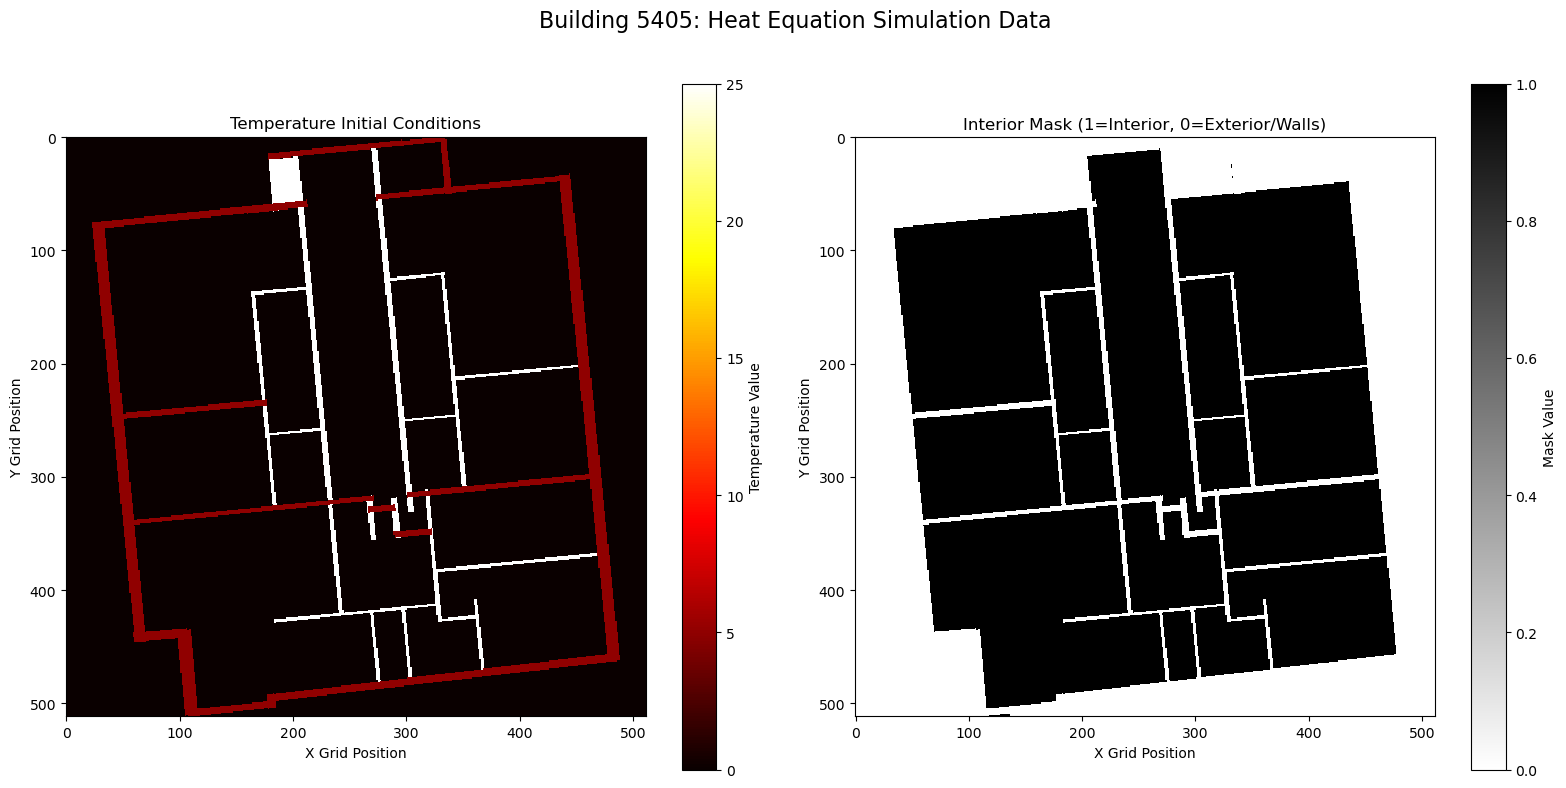

In [5]:
import numpy as np
from os.path import join

# LOAD_DIR = '/dtu/projects/02613_2025/data/modified_swiss_dwellings/'
domain_path = r"C:\Users\Madsl\Dropbox\DTU\Kand\1.Semester\HPC\Projekt\pyhpc-wallheating-project\data\5405_domain.npy"
interior_path = r"C:\Users\Madsl\Dropbox\DTU\Kand\1.Semester\HPC\Projekt\pyhpc-wallheating-project\data\5405_interior.npy"

# with open(join(LOAD_DIR, 'building_ids.txt'), 'r') as f:
#     building_ids = f.read().splitlines()

N = 1  # Default number of buildings

all_u0 = np.empty((N, 514, 514))
all_interior_mask = np.empty((N, 512, 512), dtype='bool')

u0, interior_mask = load_data(domain_path, interior_path)
all_u0 = u0
all_interior_mask = interior_mask


visualize_combined(domain_path, interior_path, save_path=None, show=True)

In [6]:
MAX_ITER = 20000
ABS_TOL = 1e-4  

all_u = np.empty_like(all_u0)


u = jacobi(u0, interior_mask, MAX_ITER, ABS_TOL)
all_u = u

stat_keys = ['mean_temp', 'std_temp', 'pct_above_18', 'pct_below_15']


stats = summary_stats(u, interior_mask)


for stat in stats:
    print(f"{stat}, {stats[stat]}")

visualize_temperature(u, title="Steady-State Temperature Distribution")

KeyboardInterrupt: 

## Run time plots

In [ ]:
# setr numpy print options
np.set_printoptions(suppress=True, precision=3)

P = np.array([1+0.000001,2, 4, 8, 16])
T = np.array([18*60+41, 10*60+57, 6*60+43, 5*60+15, 4*60+19])  # Execution times in seconds


S = T[0] / T  # Speedup

# Calculate F
S1 = S[1:]
P1 = P[1:]
F = (S1 - 1) * P1 / (S1 * (P1 - 1))

# Clamp F.mean() to avoid exceeding 1
F_mean = min(np.round(np.mean(F),3), 1.0)
B = 1 - F_mean
max_speedup = 1 / B

achieved_speedup = S[-1]
percentage_of_max = (achieved_speedup / max_speedup) * 100

# Debugging prints
print(f"F values: {F}")
print(f"Mean parallel fraction: {F_mean}")
print(f"Serial fraction (B): {B}")
print(f"Theoretical maximum speedup: {max_speedup}")
print(f"Achieved speedup with 16 cores: {achieved_speedup}")
print(f"Percentage of theoretical maximum: {percentage_of_max}%")

# time per floor plan
time_per_floor_plan = T[-1]/100
print(f"time per floor plan: {time_per_floor_plan}s")
print(f"total time for all 4571 floor plans: {time_per_floor_plan*4571}s")
# in hours 
print(f"total time for all 4571 floor plans: {np.round(time_per_floor_plan*4571/3600,3)}h")

NameError: name 'np' is not defined

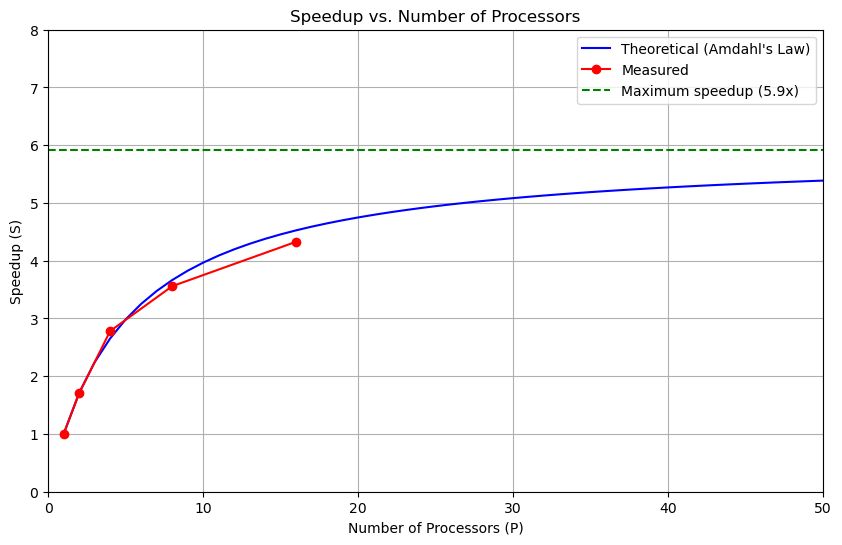

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing data
P_actual = P
S_actual = T[0]/T

# Theoretical curve according to Amdahl's law
P_theory = np.linspace(1, 100, 100)
S_theory = 1 / (B + (1-B)/P_theory)

plt.figure(figsize=(10, 6))
plt.plot(P_theory, S_theory, 'b-', label="Theoretical (Amdahl's Law)")
plt.plot(P_actual, S_actual, 'ro-', label="Measured")
plt.axhline(y=1/B, color='g', linestyle='--', label=f"Maximum speedup ({np.round(1/B, 1)}x)")

plt.xlabel('Number of Processors (P)')
plt.ylabel('Speedup (S)')
plt.title('Speedup vs. Number of Processors')
plt.legend()
plt.grid(True)
plt.ylim(0, 8)
plt.xlim(0, 50)
plt.show()

## GPU - numba (task 8)

In [ ]:
from os.path import join
import numpy as np
from numba import cuda
import math

def load_data(load_dir, bid):
    SIZE = 512
    u = np.zeros((SIZE+2, SIZE+2))
    u[1:-1, 1:-1] = np.load(join(load_dir, f"{bid}_domain.npy"))
    interior_mask = np.load(join(load_dir, f"{bid}_interior.npy"))
    return u, interior_mask


def summary_stats(u, interior_mask):
    u_interior = u[1:-1, 1:-1][interior_mask]
    mean_temp = u_interior.mean()
    std_temp = u_interior.std()
    pct_above_18 = np.sum(u_interior > 18) / u_interior.size * 100
    pct_below_15 = np.sum(u_interior < 15) / u_interior.size * 100
    return {
        "mean_temp": mean_temp,
        "std_temp": std_temp,
        "pct_above_18": pct_above_18,
        "pct_below_15": pct_below_15,
    }

@cuda.jit
def jacobi_kern(u, u_new, interior_mask):
    i,j = cuda.grid(2)

    if interior_mask[i, j]:
        # u_new = (u[:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, :-1] + u[1:-1, 1:]) / 4
        u_new[i+1, j+1] = (u[i, j+1] + u[i+2, j+1] + u[i+1, j] + u[i+1, j+2]) / 4


def cuda_jacobi(u, interior_mask, max_iter):
    # Copy data to GPU
    d_u = cuda.to_device(u)
    d_u_new = cuda.device_array_like(d_u)
    d_interior_mask = cuda.to_device(interior_mask)

    threads_per_block = (32,32)
    blocks_per_grid_x = int(np.ceil(interior_mask.shape[0] / threads_per_block[0]))
    blocks_per_grid_y = int(np.ceil(interior_mask.shape[1] / threads_per_block[1]))
    blocks_per_grid = (blocks_per_grid_x, blocks_per_grid_y)

    for _ in range(max_iter):
        jacobi_kern[blocks_per_grid, threads_per_block](d_u, d_u_new, d_interior_mask)
        cuda.synchronize()

        # Swap for next iteration
        d_u, d_u_new = d_u_new, d_u
    
    return d_u.copy_to_host()



if __name__ == '__main__':
    import numpy as np
    from os.path import join

    LOAD_DIR = '/dtu/projects/02613_2025/data/modified_swiss_dwellings/'

    with open(join(LOAD_DIR, 'building_ids.txt'), 'r') as f:
        building_ids = f.read().splitlines()

    N = 100  # Default number of buildings

    all_u0 = np.empty((N, 514, 514))
    all_interior_mask = np.empty((N, 512, 512), dtype='bool')

    for i, bid in enumerate(building_ids[:N]):
        u0, interior_mask = load_data(LOAD_DIR, bid)
        all_u0[i] = u0
        all_interior_mask[i] = interior_mask

    MAX_ITER = 20000
    ABS_TOL = 1e-4

    all_u = np.empty_like(all_u0)

    all_u_new = np.empty_like(all_u0)
    for i, (u0, interior_mask) in enumerate(zip(all_u0, all_interior_mask)):
        u = cuda_jacobi(u0, interior_mask, MAX_ITER)
        all_u[i] = u

        
    stat_keys = ['mean_temp', 'std_temp', 'pct_above_18', 'pct_below_15']
    print('building_id, ' + ', '.join(stat_keys))

    for bid, u, interior_mask in zip(building_ids, all_u, all_interior_mask):
        stats = summary_stats(u, interior_mask)
        print(f"{bid},", ", ".join(str(stats[k]) for k in stat_keys))
    print("Done")
    
    




### Run times task 8 

In [5]:

import numpy as np 
Times = np.array([9, 15 ,22, 30])  # Execution times in seconds
floor_plans = np.array([5,10,15,20])  # Number of floor plans processed

N_floor_plans = 4471  # Total number of floor plans
time_per_floor_plan = Times[-1] / floor_plans[-1]  # Time per floor plan
print(f"Time per floor plan: {time_per_floor_plan:.2f} seconds")

print(f"Total time for all {N_floor_plans} floor plans: {time_per_floor_plan * N_floor_plans:.2f} seconds")
# in hours
print(f"Total time for all {N_floor_plans} floor plans: {time_per_floor_plan * N_floor_plans / 3600:.2f} hours")

Time per floor plan: 1.50 seconds
Total time for all 4471 floor plans: 6706.50 seconds
Total time for all 4471 floor plans: 1.86 hours
